In [98]:
import pandas as pd
import numpy as np
import os,  sys
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.linear_model import LinearRegression

from mpl_toolkits import mplot3d

sys.path.append('/Users/benjaminwong/JupyterNotebooks/masters_pfti/notebooks/python/')

# import plotter

output_dir = "../outputs/grade_analysis_compare_dp_pcbc/"
SAVE = True

# Data Input and Cleaning

## PCBC

In [73]:
# we will run some heterogeneity calculations on the pcbc data in this notebook
FILE_LOC = '../data/ptfi_1/'
FILE_NAME = 'DP_block_grade estimates_actual tons_dp coordinate.xlsx'

GIF_SAVE_LOC = '../outputs/gifs/'

draw_tons = pd.read_excel(FILE_LOC + FILE_NAME, sheet_name='Drawn Tons')
cu_pcbc = pd.read_excel(FILE_LOC + FILE_NAME, sheet_name='Cu_PCBC')
au_pcbc = pd.read_excel(FILE_LOC + FILE_NAME, sheet_name='Au_PCBC')
dp_coords = pd.read_excel(FILE_LOC + FILE_NAME, sheet_name='DP_Coordinates')

draw_tons.replace(0, np.nan, inplace=True)

In [74]:
names = {
    'Draw Point Name': 'name'
}

cols = list(draw_tons.columns)
for col_name in cols:
    if isinstance(col_name, dt.datetime):
        names[col_name] = f'{col_name.year}_{col_name.month}'
        
draw_tons = draw_tons.rename(
    columns = names
)

draw_tons = draw_tons.set_index('name').astype(float)

In [75]:
names = {
    'Draw Point Name': 'name',
    44835: '2022_10'
}

cols = list(cu_pcbc.columns)
for col_name in cols:
    if isinstance(col_name, dt.datetime):
        names[col_name] = f'{col_name.year}_{col_name.month}'
        
cu_pcbc = cu_pcbc.rename(
    columns = names
)

cu_pcbc = cu_pcbc.set_index('name').astype(float)

In [76]:
names = {
    'Draw Point Name': 'name'
}

cols = list(au_pcbc.columns)
for col_name in cols:
    if isinstance(col_name, dt.datetime):
        names[col_name] = f'{col_name.year}_{col_name.month}'
        
au_pcbc = au_pcbc.rename(
    columns = names
)

au_pcbc = au_pcbc.set_index('name').astype(float)

In [77]:
dp_coords = dp_coords.rename(
    columns={
        "Draw Point Name": "name", 
        "X-dpt": "x",
        'Y-dpt': 'y',
        'Z-dpt': 'z'
    }
)
dp_coords = dp_coords.set_index('name')

## DP Assays

In [78]:
# We will analyse the renamed "dmlz_assay" csv file in this notebook

assay = pd.read_csv("../data/ptfi_1/dmlz_assay.csv")
assay['Tons_Sampling'] = assay['Tons_Sampling'].astype(float)

rename_cols = list(assay.columns)[7:-1]
for col in rename_cols:
    assay = assay.rename(columns={col: col.split('_')[0].upper()})

# Grouping

## PCBC

In [111]:
def clean_data(weights, cu_grades, au_grades):
    weights.name = 'weight'
    cu_grades.name = 'CU'
    au_grades.name = 'AU'
    
    info = pd.concat([weights, cu_grades, au_grades], axis=1).dropna()
    return info['weight'], info['CU'], info['AU']


def plot_au_vs_cu(ax, w, x, y, dhid=None, min_s=2, max_s=298):
    min_w = min(w)
    max_w = max(w)
    cmap = plt.colormaps.get('copper')
    norm = colors.Normalize(vmin=min_w, vmax=max_w)

    s = (min_s + max_s * norm(w))

    # create linear regression model
    model = LinearRegression()

    # define predictor and response variables
    X = np.array(x)
    X = X.reshape(-1, 1)

    # fit regression model
    model.fit(X, y, w)
    r_squared = model.score(X, y, w)
    m, b = model.coef_[0], model.intercept_
    # print(r_squared, m, b)

    # Graph
    ax.scatter(x, y, c=cmap(norm(w)), s=s)
    ax.axline((0, b), slope=m, color='lightblue', ls='--', label=f'y = {m:.3f}x + {b:.3f}')

    ax.set_xlim(0)
    ax.set_ylim(0)

    ax.set_title(f'{dhid}_AU_vs_CU_R2={r_squared:.2f}')
    ax.set_xlabel('CU grade (%)')
    ax.set_ylabel('AU grade (ppm)') 
    
    ax.legend()
    
    return r_squared     

In [105]:
months = list(draw_tons.columns)
dhids = list(draw_tons.index)

No data for P04-11W
No data for P04-12W
No data for P04-13W
No data for P04-14W
No data for P04-15W
No data for P05-08W
No data for P05-09W
No data for P05-10W
No data for P05-11E
No data for P05-11W
No data for P05-12E
No data for P05-12W
No data for P05-13E
No data for P05-13W
No data for P05-14E
No data for P05-14W
No data for P05-15E
No data for P05-15W
No data for P05-16W
No data for P05-17W
No data for P05-18W
No data for P05-19W
No data for P05-20W
No data for P06-07W
No data for P06-08E
No data for P06-08W
No data for P06-09E
No data for P06-09W
No data for P06-10E
No data for P06-10W
No data for P06-11E
No data for P06-11W
No data for P06-12E
No data for P06-12W
No data for P06-13E
No data for P06-13W
No data for P06-14E
No data for P06-14W
No data for P06-15E
No data for P06-15W
No data for P06-16E
No data for P06-16W
No data for P06-17E
No data for P06-17W
No data for P06-18E
No data for P06-18W
No data for P06-19E
No data for P06-19W
No data for P06-20E
No data for P06-20W


/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


No data for P24-02W
No data for P24-03W
No data for P25-02E
No data for P25-02W
No data for P25-03E
No data for P25-03W
No data for P25-04W
No data for P25-05W
No data for P25-06W
No data for P25-07W
No data for P25-08W


/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


No data for P26-02E
No data for P26-02W
No data for P26-03E
No data for P26-03W
No data for P26-04E
No data for P26-04W
No data for P26-05E
No data for P26-05W
No data for P26-06E
No data for P26-06W
No data for P26-07E
No data for P26-07W
No data for P26-08E
No data for P26-08W
No data for P26-09W
No data for P26-10W
No data for P26-11W
No data for P26-12W
No data for P26-13W
No data for P26-14W
No data for P27-02E
No data for P27-02W
No data for P27-03E
No data for P27-03W
No data for P27-04E
No data for P27-04W
No data for P27-05E
No data for P27-05W
No data for P27-06E
No data for P27-06W
No data for P27-07E
No data for P27-07W
No data for P27-08E
No data for P27-08W
No data for P27-09E
No data for P27-09W
No data for P27-10E
No data for P27-10W
No data for P27-11E
No data for P27-11W
No data for P27-12E
No data for P27-12W
No data for P27-13E
No data for P27-13W
No data for P27-14E
No data for P27-14W
No data for P28-02E
No data for P28-02W
No data for P28-03E
No data for P28-03W


/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



No data for P84-21W
No data for P84-22E
No data for P84-22W
No data for P84-23E
No data for P84-23W
No data for P85-07E
No data for P85-07W
No data for P85-08E
No data for P85-08W
No data for P85-09E
No data for P85-09W
No data for P85-10E
No data for P85-10W
No data for P85-11E
No data for P85-11W
No data for P85-12E
No data for P85-12W
No data for P85-13E
No data for P85-13W
No data for P85-14E
No data for P85-14W
No data for P85-15E
No data for P85-15W
No data for P85-16E
No data for P85-16W
No data for P85-17E
No data for P85-17W
No data for P85-18E
No data for P85-18W
No data for P85-19E
No data for P85-19W
No data for P85-20E
No data for P85-20W
No data for P85-21E
No data for P85-21W
No data for P85-22E
No data for P85-22W
No data for P85-23E
No data for P85-23W
No data for P86-07E
No data for P86-07W
No data for P86-08E
No data for P86-08W
No data for P86-09E
No data for P86-09W
No data for P86-10E
No data for P86-10W
No data for P86-11E
No data for P86-11W
No data for P86-12E

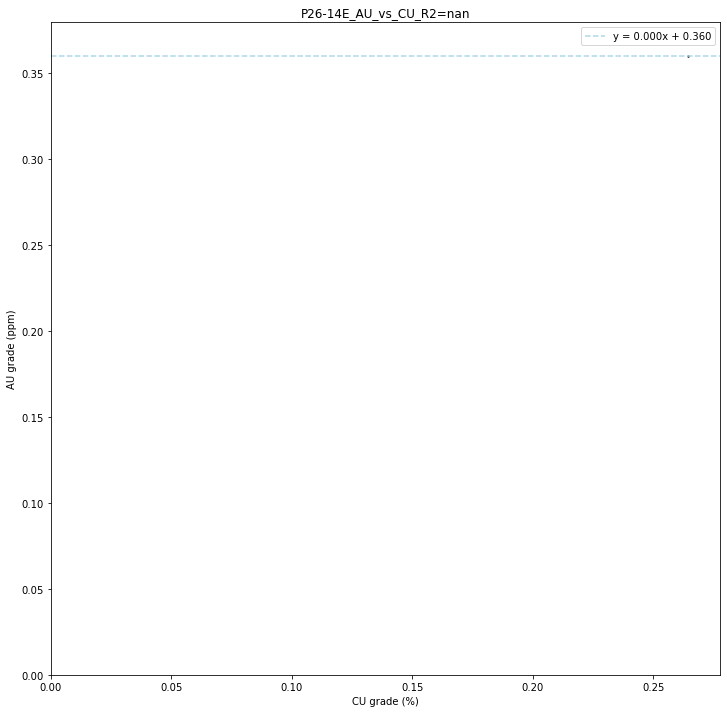

In [112]:
fig = plt.figure()
fig.set_size_inches(12, 12)
ax = fig.add_subplot()

# Iterate over each drillhole
for dhid in dhids:
    # Get CU Grades
    weights = draw_tons.loc[dhid]
    if weights.isnull().all():
        print(f"No data for {dhid}")
    else:
        # Get CU and AU Grades
        w, x, y = clean_data(weights, cu_pcbc.loc[dhid], au_pcbc.loc[dhid])
        
        ax.cla()
        r2 = plot_au_vs_cu(ax, w, x, y, dhid=dhid)
        
        if SAVE:
            save_loc = output_dir + f'{dhid}/'
            if not os.path.exists(save_loc):
                os.makedirs(save_loc)
            fig.savefig(save_loc + f'{dhid}_R2={r2}.svg', format='svg')

# TODO: do not perform linear regression on drawpoints with fewer than 3 values

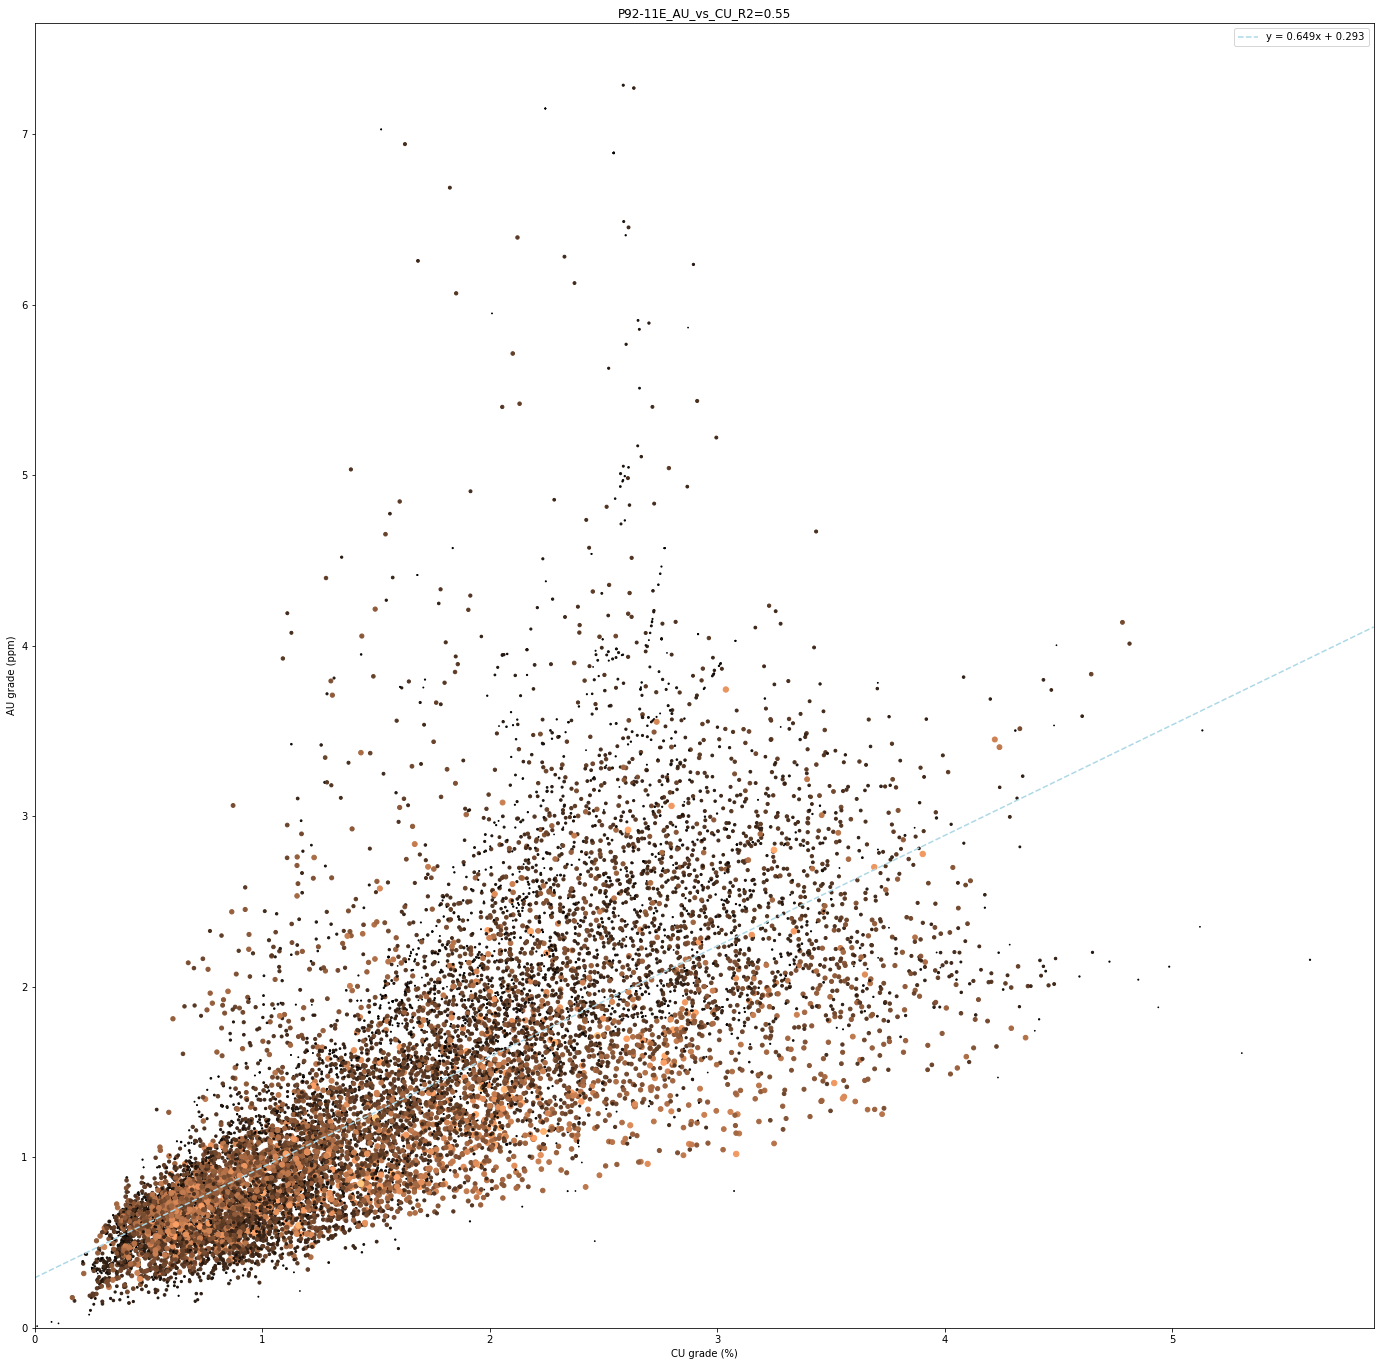

In [113]:
# Perform the same code but for the master dataset

fig = plt.figure()
fig.set_size_inches(24, 24)
ax = fig.add_subplot()


w, x, y = clean_data(
    pd.Series(draw_tons.to_numpy().flatten()), 
    pd.Series(cu_pcbc.to_numpy().flatten()), 
    pd.Series(au_pcbc.to_numpy().flatten())
)

ax.cla()
r2 = plot_au_vs_cu(ax, w, x, y, dhid=dhid, min_s=0.5, max_s=38)

if SAVE:
    save_loc = output_dir + f'master/'
    if not os.path.exists(save_loc):
        os.makedirs(save_loc)
    fig.savefig(save_loc + f'master_R2={r2}.svg', format='svg')

## DP Assays

In [ ]:
dhids = assay['HOLEID'].unique()

dp_groups = {}

for dhid in dhids:
    data = assay.query('HOLEID == @dhid')
    
    weights = data['SampleWeight']
    if weights.isnull().all():
        print(f"No data for {dhid}")
    else:
        dp_groups[dhid] = Grouping(dhid)
        for element in elements:
            dp_groups[dhid].add_resource(element, weights, data[element])